In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
titles_df = pd.read_csv("titles.csv")
titles_df.drop(columns = ['id','description','seasons','imdb_id'], inplace = True)
titles_df['genres'] = titles_df['genres'].apply(ast.literal_eval)
titles_df['production_countries'] = titles_df['production_countries'].apply(ast.literal_eval)
titles_df['primary_genre'] = titles_df['genres'].apply(lambda x: x[0] if x else 'Unknown')
titles_df['primary_country'] = titles_df['production_countries'].apply(lambda x: x[0] if x else 'Unknown')
country_name_to_iso = {'Lebanon': 'LB'}
titles_df['primary_country'] = titles_df['primary_country'].replace(country_name_to_iso)
titles_df.reset_index(drop=True, inplace=True)
titles_df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,[documentation],[US],NaN,NaN,0.600,NaN,documentation,US
1,Taxi Driver,MOVIE,1976,R,114,"[drama, crime]",[US],8.2,808582.0,40.965,8.179,drama,US
2,Deliverance,MOVIE,1972,R,109,"[drama, action, thriller, european]",[US],7.7,107673.0,10.010,7.300,drama,US
3,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"[fantasy, action, comedy]",[GB],8.2,534486.0,15.461,7.811,fantasy,GB
4,The Dirty Dozen,MOVIE,1967,NaN,150,"[war, action]","[GB, US]",7.7,72662.0,20.398,7.600,war,GB


In [3]:
country_to_continent = {
    'US': 'North America', 'GB': 'Europe', 'EG': 'Africa', 'IN': 'Asia', 'SU': 'Europe', 
    'LB': 'Asia', 'AR': 'South America', 'JP': 'Asia', 'FR': 'Europe', 'DE': 'Europe',
    'IT': 'Europe', 'CA': 'North America', 'IE': 'Europe', 'HK': 'Asia', 'AU': 'Oceania',
    'MX': 'North America', 'ES': 'Europe', 'CO': 'South America', 'PS': 'Asia', 'BE': 'Europe',
    'TR': 'Asia', 'DK': 'Europe', 'MT': 'Europe', 'KR': 'Asia', 'CN': 'Asia',
    'CL': 'South America', 'CZ': 'Europe', 'TW': 'Asia', 'SG': 'Asia', 'MY': 'Asia',
    'NG': 'Africa', 'ZA': 'Africa', 'PH': 'Asia', 'AE': 'Asia', 'HU': 'Europe',
    'NO': 'Europe', 'SA': 'Asia', 'ID': 'Asia', 'FI': 'Europe', 'IL': 'Asia',
    'AT': 'Europe', 'RU': 'Europe', 'VE': 'South America', 'BR': 'South America', 'RO': 'Europe',
    'NZ': 'Oceania', 'UA': 'Europe', 'CH': 'Europe', 'GH': 'Africa', 'BG': 'Europe',
    'IS': 'Europe', 'SE': 'Europe', 'NL': 'Europe', 'HR': 'Europe', 'TN': 'Africa',
    'GL': 'North America',  
    'PT': 'Europe', 'QA': 'Asia', 'PK': 'Asia', 'VN': 'Asia', 'TH': 'Asia',
    'IR': 'Asia', 'GE': 'Asia', 'PL': 'Europe', 'PR': 'North America', 'PE': 'South America',
    'KH': 'Asia', 'RS': 'Europe', 'TZ': 'Africa', 'NP': 'Asia', 'BD': 'Asia',
    'KG': 'Asia', 'KW': 'Asia', 'BT': 'Asia', 'JO': 'Asia', 'IO': 'Asia',  
    'SN': 'Africa', 'MA': 'Africa', 'CM': 'Africa', 'AF': 'Asia', 'UY': 'South America',
    'NA': 'Africa', 'GR': 'Europe', 'KE': 'Africa'
}

In [4]:
titles_df['continent'] = titles_df['primary_country'].map(country_to_continent)

interested_genres = ['scifi', 'action', 'drama', 'thriller', 'comedy', 'fantasy']
filtered_df = titles_df[titles_df['primary_genre'].isin(interested_genres)]

filtered_df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country,continent
1,Taxi Driver,MOVIE,1976,R,114,"[drama, crime]",[US],8.2,808582.0,40.965,8.179,drama,US,North America
2,Deliverance,MOVIE,1972,R,109,"[drama, action, thriller, european]",[US],7.7,107673.0,10.010,7.300,drama,US,North America
3,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"[fantasy, action, comedy]",[GB],8.2,534486.0,15.461,7.811,fantasy,GB,Europe
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"[comedy, european]",[GB],8.8,73424.0,17.617,8.306,comedy,GB,Europe
6,Life of Brian,MOVIE,1979,R,94,[comedy],[GB],8.0,395024.0,17.770,7.800,comedy,GB,Europe


/var/folders/cj/fpg2r1gd3ys5xrg77691mvz00000gn/T/ipykernel_18127/177980115.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


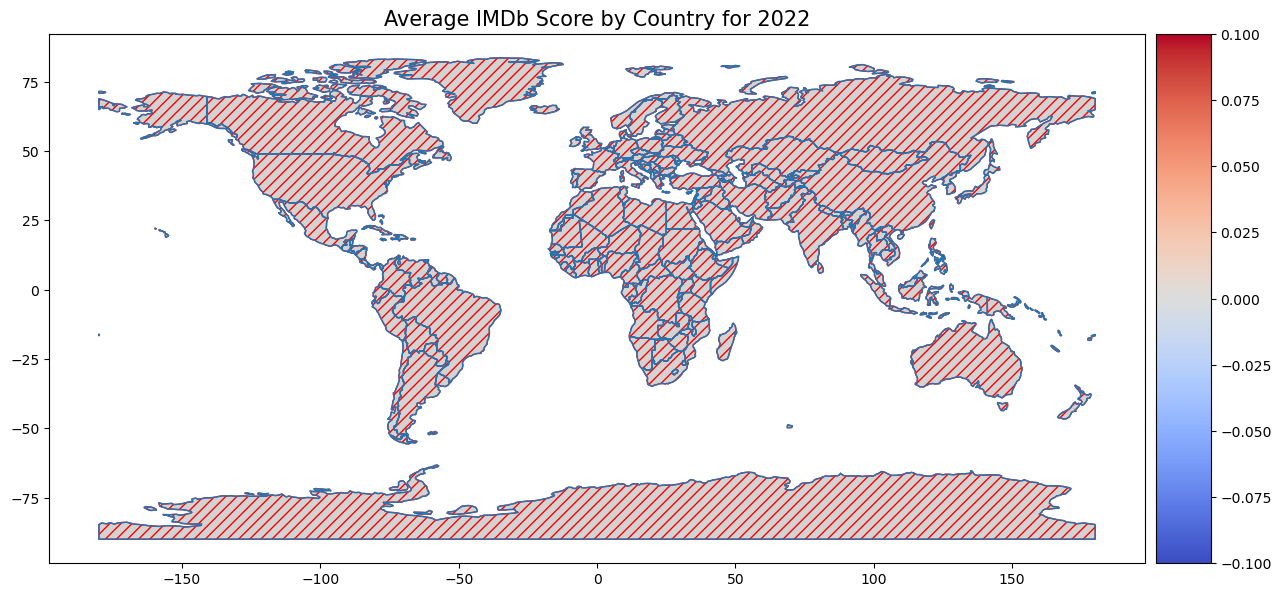

In [5]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


data_2022 = filtered_df[filtered_df['release_year'] == 2022].groupby('primary_country')['imdb_score'].mean().reset_index()


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


world = world.merge(data_2022, left_on='iso_a3', right_on='primary_country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='imdb_score', ax=ax, legend=True, cax=cax, cmap='coolwarm', missing_kwds={
    "color": "lightgrey",
    "edgecolor": "red",
    "hatch": "///",
    "label": "Missing data",
})

ax.set_title('Average IMDb Score by Country for 2022', fontsize=15)
plt.show()


In [7]:

data_2022_csv = filtered_df[filtered_df['release_year'] == 2022].groupby('primary_country')['imdb_score'].mean().reset_index()


data_2022_csv_path = "csv_file_for_tableau.csv"
data_2022_csv.to_csv(data_2022_csv_path, index=False)

data_2022_csv_path


'csv_file_for_tableau.csv'

('pie_chart_types_enhanced_text.png',
 'pie_chart_age_certification_enhanced_text.png')

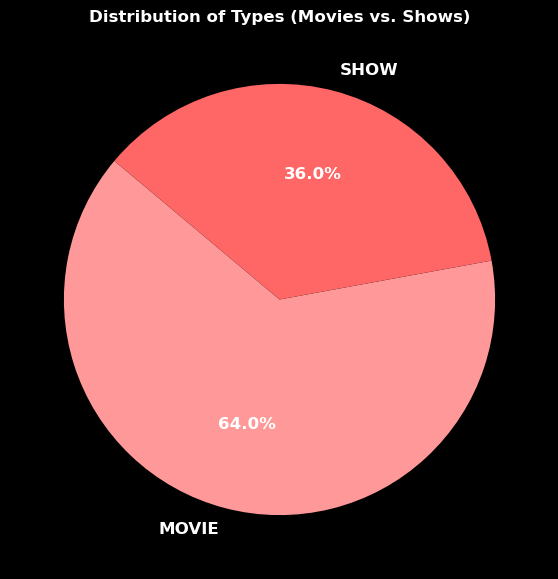

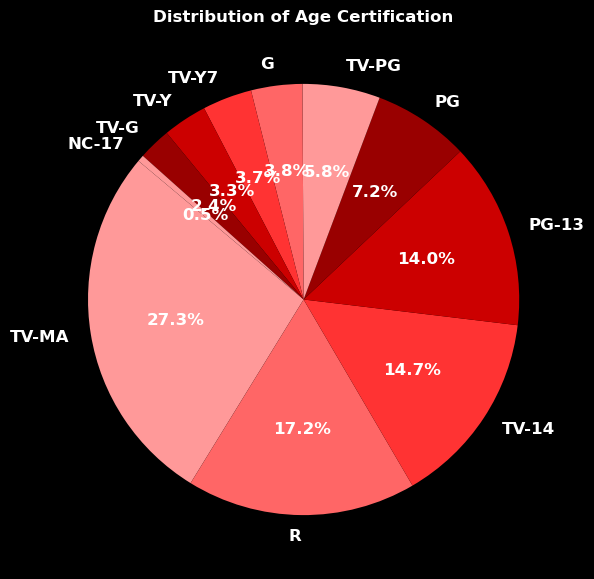

In [12]:
colors = ['#ff9999','#ff6666','#ff3333','#cc0000','#990000']
bg_color = 'black'
text_props = {'color': 'white', 'weight': 'bold', 'size': 12}

fig_type, ax_type = plt.subplots(figsize=(7, 7), facecolor=bg_color)
type_patches, type_texts, type_autotexts = ax_type.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax_type.set_title('Distribution of Types (Movies vs. Shows)', **text_props)

for text in type_texts:
    text.set_color('white')
    text.set_fontsize(12)
    text.set_weight('bold')
for text in type_autotexts:
    text.set_color('white')
    text.set_fontsize(12)
    text.set_weight('bold')
fig_type_path = "pie_chart_types_enhanced_text.png"
fig_type.savefig(fig_type_path, facecolor=fig_type.get_facecolor())


fig_age, ax_age = plt.subplots(figsize=(7, 7), facecolor=bg_color)
age_patches, age_texts, age_autotexts = ax_age.pie(age_certification_counts, labels=age_certification_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax_age.set_title('Distribution of Age Certification', **text_props)


for text in age_texts + age_autotexts:
    text.set_color('white')
    text.set_fontsize(12)
    text.set_weight('bold')

fig_age_path = "pie_chart_age_certification_enhanced_text.png"
fig_age.savefig(fig_age_path, facecolor=fig_age.get_facecolor())

(fig_type_path, fig_age_path)


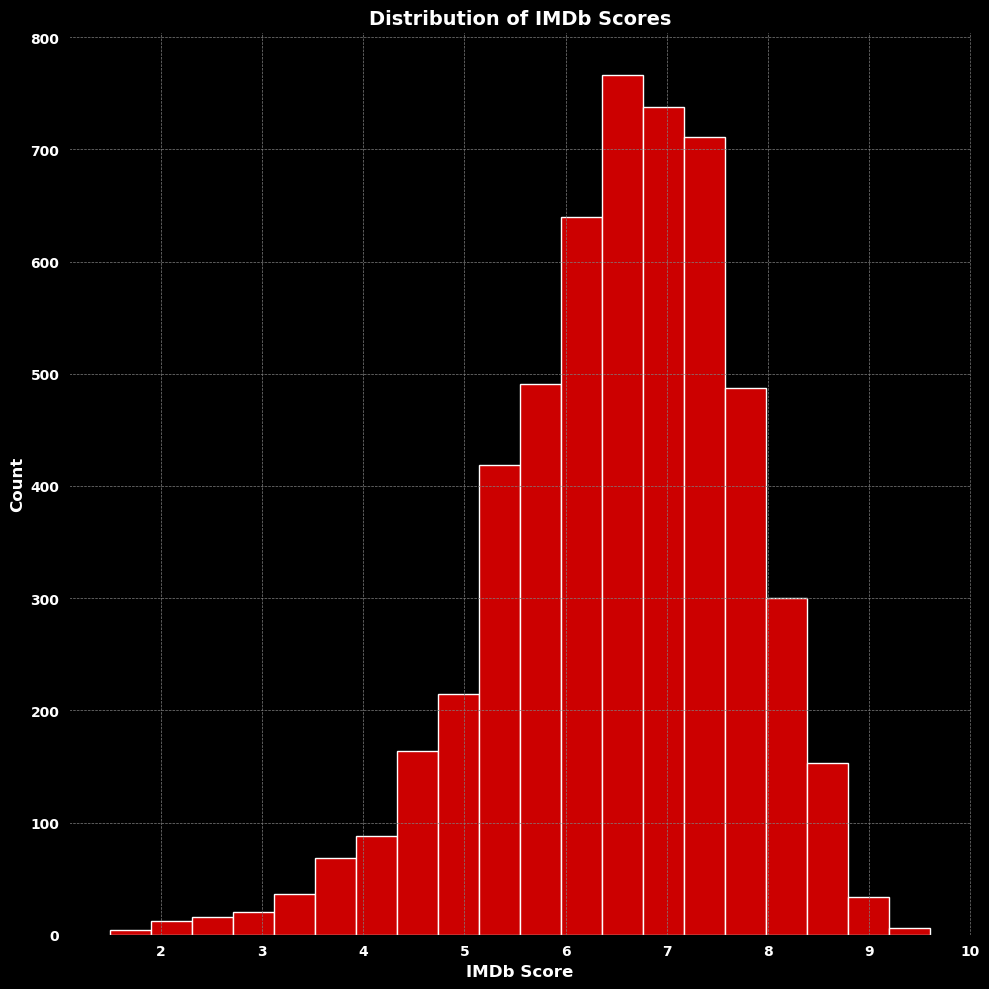

In [15]:


plt.figure(figsize=(10, 10), facecolor='black')


plt.hist(titles_df['imdb_score'].dropna(), bins=20, color='#cc0000', edgecolor='white')
plt.title('Distribution of IMDb Scores', color='white', weight='bold', size=14)
plt.xlabel('IMDb Score', color='white', weight='bold', size=12)
plt.ylabel('Count', color='white', weight='bold', size=12)

plt.xticks(color='white', weight='bold')
plt.yticks(color='white', weight='bold')

plt.gca().set_facecolor('black')
plt.grid(color='grey', linestyle='--', linewidth=0.5)

plt.tight_layout()

histogram_path = "imdb_scores_histogram.png"
plt.savefig(histogram_path, facecolor='black')

